In [11]:
import nltk, collections
import numpy as np
from nltk.collocations import *
from nltk.corpus import stopwords
import subprocess
import pandas as pd
import re
from sklearn.externals import joblib
import random

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import candidate_list_gen
import dataframe_generation
import Classifier
import math

In [12]:
import preprocessing
# This reads the *.tex sources and dumps them to a file
preprocessing.dump_detex_data()
feature_list_from_tex = ["indices","sections","subsections","large","underline","italicized","bold"]

Processed 88 source files and dumped data


In [13]:
feature_dict = preprocessing.populate_properties()

In [14]:
df = pd.DataFrame([])
for filename in feature_dict:
    feature_dict[filename]["candidate_list"] = candidate_list_gen.process_text(feature_dict[filename]["plaintext"])
    df = df.append(dataframe_generation.generate_dataframe(filename,feature_dict[filename],feature_list_from_tex))


In [15]:
"""
words = set(df["word"])
idf = {}
for w in words:
    idf[w] = len(df[df["word"]==w])
"""

grouping = df.groupby('word').size()
n = 88 #source files
idf_df = pd.DataFrame({'word':grouping.index, 'idf':grouping.values})
idf_df["idf"] = n/((idf_df["idf"])+1)
idf_df["idf"] = idf_df["idf"].apply(math.log)
print(idf_df[idf_df['word']=='example'])
print(idf_df[idf_df['word']=='integration'])
print(idf_df[idf_df['word']=='physical'])
print(idf_df[idf_df['word']=='zerogravity'])


            idf     word
15132  0.034686  example
            idf         word
18692  1.912387  integration
            idf      word
22584  0.839751  physical
           idf         word
29973  3.78419  zerogravity


In [16]:
test_files = ["dataset/discover_physics/ch02/ch02.tex","dataset/discover_physics/ch04/ch04.tex","dataset/general_relativity/ch03/ch03.rbtex","dataset/general_relativity/ch05/ch05.rbtex"]

df_test = pd.DataFrame([])
df_train = pd.DataFrame([])

df_test = df.loc[df.filename.isin(test_files),]
df_test = df_test.append([df_test[df_test.indices==1]])
print(df_test.shape)
print(df_test[df_test.indices==1])
df_test.to_csv("test.csv")

df_train = df.loc[~df.filename.isin(test_files),]
df_train = df_train.append([df_train[df_train.indices==1]]*100)
print(df_train.shape)
print(df_train[df_train.indices==1])

df_train.to_csv("training.csv")


(8253, 26)
                          word  pos  wordcount  NN  NNP  NNS  VBG  VBD  VBN  \
8                        field   NN         13   1    0    0    0    0    0   
20                   Lavoisier  NNP         13   0    1    0    0    0    0   
24                      Optics  NNP          1   0    1    0    0    0    0   
162                  Aristotle  NNP          2   0    1    0    0    0    0   
265                     energy   NN        202   1    0    0    0    0    0   
329   correspondence principle   NN          1   1    0    0    0    0    0   
482               Orion Nebula  NNP          1   0    1    0    0    0    0   
723                      power   NN          5   1    0    0    0    0    0   
794                       moon   NN          6   1    0    0    0    0    0   
1103                   gravity   NN         18   1    0    0    0    0    0   
1139              conservation   NN         50   1    0    0    0    0    0   
1616                  symmetry   NN      

(184382, 26)
                      word  pos  wordcount  NN  NNP  NNS  VBG  VBD  VBN  VBZ  \
394          normalization   NN          3   1    0    0    0    0    0    0   
538           acceleration   NN         43   1    0    0    0    0    0    0   
594   tubular neighborhood   JJ          1   0    0    0    0    0    0    0   
784               rapidity   NN          3   1    0    0    0    0    0    0   
873               velocity   NN         68   1    0    0    0    0    0    0   
1272   projection operator   NN          1   1    0    0    0    0    0    0   
1086                 limit   NN         68   1    0    0    0    0    0    0   
226                  light   NN         78   1    0    0    0    0    0    0   
330                   time   NN         39   1    0    0    0    0    0    0   
432             supernovae   JJ          8   0    0    0    0    0    0    0   
668                 aether   NN         16   1    0    0    0    0    0    0   
788               velocity 

TP, FP, TN, FN   : 8 78 8047 120
The index words generated by the model are
[0 0 0 ..., 0 0 0] 0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      0
       ..
8223    1
8224    1
8225    1
8226    1
8227    1
8228    1
8229    1
8230    1
8231    1
8232    1
8233    1
8234    1
8235    1
8236    1
8237    1
8238    1
8239    1
8240    1
8241    1
8242    1
8243    1
8244    1
8245    1
8246    1
8247    1
8248    1
8249    1
8250    1
8251    1
8252    1
Name: indices, Length: 8253, dtype: int64
Accuracy score is  97.60087241
Root Mean Squared Error: 0.1548911743763112
Mean absolute error: 0.0239912758997
Micro stats:
(0.97600872410032713, 0.97600872410032713, 0.97600872410032713, None)
Macro stats:
(0.53916498899427934, 0.52644999999999997, 0.

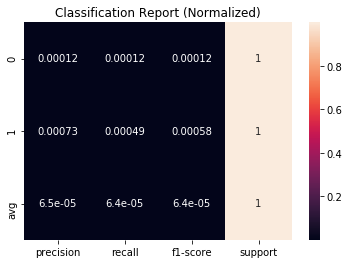

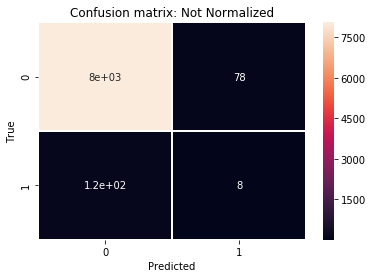

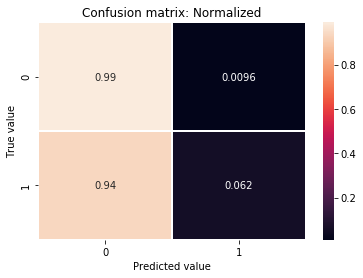

In [17]:
Classifier.classifier("training.csv","test.csv")